# KALP YETMEZLİĞİ ANN

### Kütüphanelerimizi Tanımlıyoruz

In [42]:
import numpy as np#matematiksel işlemler için
import pandas as pd#veri işleme çekme işlemi için
import tensorflow as tf#Açık kaynak kodlu derin öğrenme kütüphanesidir.
import matplotlib.pyplot as plt#2D,3D grafikler için kullanılan bir kütüphane
import matplotlib#Veri görselleştirmemizde kullandığımız bir pyton kütüphanesidir.
import seaborn as sns#bilgilendirici istatistiksel grafikler kullanmamızı sağlayan kütüphane
import warnings

### Verimizi Pandas İle Csv Formatından Çekiyoruz

In [43]:
dataset = pd.read_csv('C:/Users/firno/Desktop/heart_failure_clinical_records_dataset.csv')
dataset.head(-1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0


### Verimizin Kaç Nitelik Ve Veriden Oluştuğunu Görüyoruz

In [44]:
dataset.shape

(299, 13)

### Sayısal Verimizin Özelliklerini Görüyoruz

In [45]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [46]:
X = dataset.iloc[:, 0:12].values # Özellik yani bağımsız değişkenlerin seçimi burada yapılır
y = dataset.iloc[:, -1].values 
# X bağımlı değişkeni açıklamakta kullanılan değişken veya değişkenler
# Y açıklamak istenilen hedef değişken.

### Veriyi Train Test İşlemine Alım

In [47]:
# Verimizi eğitim ve test şeklinde 2 ye ayırdık eğitime alınan kısımı verinin yüzde 75 i test kısmını yüzde olarak kabul ettik
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4) 

#### Veriler arasında farklılığın çok fazla olmasından dolayı normalize etmenin doğru olacağını düşündüm ve verimi 0–1 arasına entegre etmek istediğim için MinMaxScaler ölçeklendirmesini kullandım. Standart scaler kullanarak da test edebilirsiniz.
#### Bağımlı değişkenimi bundan faydalandırıdım.


In [48]:
## Standartizasyon (Ölçeklendirme metodu)
#from sklearn.preprocessing import StandardScaler
##sc = StandardScaler() 
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [49]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
X_train

array([[0.54545455, 0.        , 0.00599036, ..., 0.        , 0.        ,
        0.25724638],
       [0.18181818, 0.        , 0.02956114, ..., 1.        , 1.        ,
        0.42028986],
       [0.07272727, 0.        , 0.00794374, ..., 1.        , 0.        ,
        0.27173913],
       ...,
       [0.45454545, 0.        , 0.01875244, ..., 0.        , 0.        ,
        0.65942029],
       [0.45454545, 0.        , 0.02278943, ..., 1.        , 1.        ,
        0.51449275],
       [0.36363636, 0.        , 0.00950645, ..., 0.        , 0.        ,
        0.32971014]])

#### İlk iki katmanda aktivasyon olarak ‘relu’ kullandım sebebi iyi bir tahmin edici olması ve [0,+&] aralığında değer almasıdır


### Yapay Sinir Ağı Başlangıcı

In [51]:
# **ANN BAŞLANGICI** aktivasyon fonksiyonları SEQUENTİAL ile başlatmak
ann = tf.keras.models.Sequential()
# Giriş katmanını ve ilk gizli katmana 12 birim node oluşturmak ve alacağı değerler x verimizdeki değerler
ann.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=X_train[0].shape))
# İkinci gizli katmanı ekleme
#ReLU fonksiyonu negatif girdiler için 0 değerini alırken, x pozitif girdiler için x değerini almaktadır.
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
# Sonuç katmanını ekleme
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# 12 ve 8 düğümden oluşan Aktivasyon kullanımı yapıyoruz 
#En yaygın kullanılan aktivasyon fonksiyonlarından birisidir, [0,1] aralığında çıktı üretir.

##### Sigmoid Karar vermeye yönelik olasılıksal bir yaklaşımdır ve değer aralığı [0,1] arasındadır.

### Yapay Sinr Ağımızın Özeti

In [52]:
ann.summary() 
# ilk katman (12 * 12) + 12
# ikinci katman (12 * 8) + 8
# Output yani sonuç katmanı (8 * 1) + 1 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


##### Loss degeri hata değeridir sürekli düşürmeye çalışmaktayız. binary_crossentropy kayıp fonsiyonudur ve iki farklılığı ayırmak için kullanılır

### Modeli Derliyoruz

In [53]:
#  Doğrusal olmayan problemlerin çözümünde optimum değeri bulmak için optimizasyon yöntemleri kullanılmaktadır. 
#İçlerinde en kullanışlısı ReLu’dur. ReLu’da sigmoid’e göre parametreler daha hızlı bir şekilde öğrenilmektedir. PReLu ise, ReLU’nun kaçırdığı negatif değerleri yakalamaktadır; eğer bizim için negatif değerler önemliyse PReLu tercih edilmelidir.
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 20, epochs = 100)
# batch_size 20 gözlemden sonra ağırlığını güncellediğini gösterir
# Epoch, ağ üzerinden tüm veri akışının bir turudur. Burada 100'ü seçiyoruz.

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 0.6986 - accuracy: 0.5402
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5714
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.6384
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.6562
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6607
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6696
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.6741
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.6741
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6741
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.6741
Epoch 11/

12/12 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.8482
Epoch 84/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8482
Epoch 85/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8527
Epoch 86/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8482
Epoch 87/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8527
Epoch 88/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8482
Epoch 89/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8527
Epoch 90/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8482
Epoch 91/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8527
Epoch 92/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8527
Epoch 93/100


In [54]:
print(ann.predict(sc.transform([[42, 0, 345, 1, 26, 1, 265000, 2, 141, 0, 0, 50]])))

[[0.84093904]]


In [55]:
# Test edersek : 
print(ann.predict(sc.transform([[42, 0, 345, 1, 26, 1, 265000, 2, 141, 0, 0, 50]])) > 0.5)
# Yanlış ise, bu kişinin hayatta kalacağı tahminini gösterir. ve bu kişi tahminen ölmüştür.

[[ True]]


In [56]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
pd.DataFrame(list(zip(y_test, y_pred)), columns=['ASLINDA OLAN', 'TAHMIN EDILEN'])


,ASLINDA OLAN,TAHMIN EDILEN
0,1,[False]
1,0,[False]
2,0,[False]
3,0,[False]
4,1,[True]
...,...,...
70,0,[False]
71,1,[True]
72,0,[False]
73,0,[False]


### Doğruluğu Grafiğe Dökelim

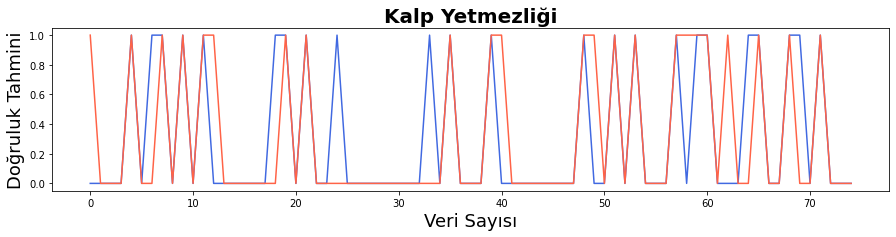

In [64]:
plt.figure(figsize=(15,3))
plt.plot(y_pred[0:75],label="Test Verisi", color='royalblue')
plt.plot(y_test[0:75],label="Tahmin verisi", color='tomato')
plt.title('Kalp Yetmezliği', size = 20, fontweight='bold')
plt.xlabel('Veri Sayısı',fontsize=18)#X kordinatında yazı ve büyüklüğü
plt.ylabel('Doğruluk Tahmini',fontsize=18)#Y kordinatında yazı ve büyüklüğü
plt.show()

### Skor Hesaplama

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
#true pozitif ve negatifi false pozitif ve negatife bölerek doğruluk orarnına ulaşıoruz
# Tahminimize skor verelim. Testte verilen ve alınan dogru yanlıs degerlere bakalım. % başarı oranını yakaladığımızı görelim

[[46  6]
 [ 6 17]]
0.84


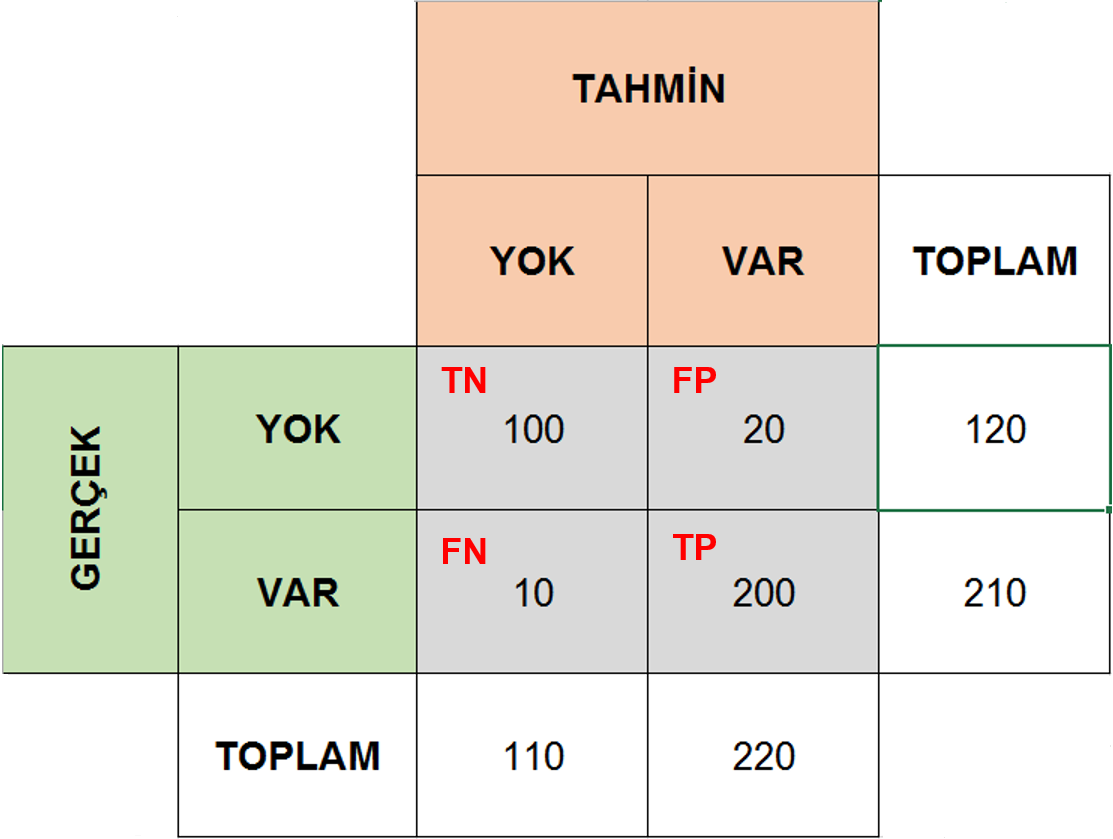